# Exploratory Data Analysis – Mini Project:

## Data Preprocessing

### 1.	Import the necessary libraries and read the data.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [13]:
df=pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [14]:
df.shape

(18207, 60)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

### 2. Drop any columns that you deen unecessary for analysis.

In [16]:
df.drop(['Photo','Club Logo','Flag','Jersey Number','Loaned From'],axis=1,inplace=True)

### 3. Convert certain datatypes of columns for further analysis.

In [17]:
def strip_prefix_suffix(col):
    for i in df.index:
        try:
            df.loc[i,col] = df.loc[i,col].strip('€')
            if 'K' in df.loc[i,col]:
                df.loc[i,col] = df.loc[i,col].strip('K')
                df.loc[i,col] = float(df.loc[i,col])*1000
            elif 'M' in df.loc[i,col]:
                df.loc[i,col] = df.loc[i,col].strip('M')
                df.loc[i,col] = float(df.loc[i,col])*1000000
        except:
            df.loc[i,col] = np.nan
    
    df[col] = df[col].astype('float64')

In [18]:
strip_prefix_suffix('Value')
strip_prefix_suffix('Wage')

In [19]:
print(df[['Value','Wage']].dtypes)

Value    float64
Wage     float64
dtype: object


In [21]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,"Aug 3, 2017",2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,"Jul 1, 2011",2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,"Aug 30, 2015",2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [10]:
df['Joined'].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Aug 3, 2017', ..., 'May 22, 2017',
       'Nov 6, 2016', 'Nov 27, 2018'], dtype=object)

In [11]:

df['Joined']=pd.DatetimeIndex(df['Joined']).year

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Joined'>

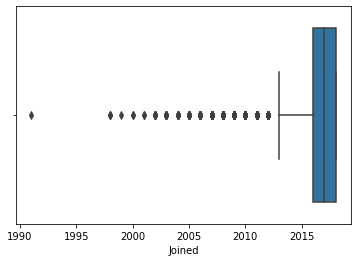

In [12]:
sns.boxplot(df['Joined'])

In [13]:
df["Joined"] = df["Joined"].fillna('2018')

In [14]:
df['Joined'].mode()

0    2018.0
dtype: object

In [15]:
df["Joined"].isna().sum()

0

In [16]:
df["Joined"]= df["Joined"].astype('int')

In [17]:
df['Joined'].isnull().sum()

0

In [ ]:
# As there are missing values in the 'Joined' it cannot be converted to int as nan values are float.
# So, we need to handle missing values before weconvert it to int.

In [18]:
df['Contract Valid Until']=df['Contract Valid Until'].astype('datetime64[ns]')

In [19]:
df['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [20]:
df['Height']=df['Height'].str.replace("'",".")

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

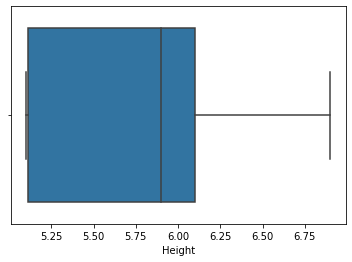

In [21]:
df['Height']=df['Height'].astype('float')
sns.boxplot(df['Height'])

In [22]:
df['Height']=df['Height'].fillna(df['Height'].mean())

In [23]:
df['Height'].isnull().sum()

0

In [24]:
df['Weight']=df['Weight'].str.rstrip('lbs').astype('float')

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

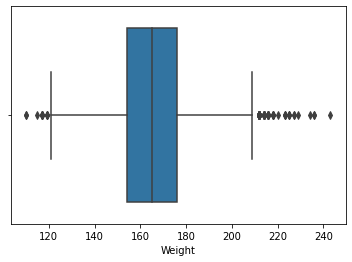

In [25]:
sns.boxplot(df['Weight'])

In [26]:
df['Weight']=df['Weight'].fillna(df['Weight'].median())

In [27]:
df['Weight'].isnull().sum()

0

In [28]:
df['Release Clause']=df['Release Clause'].str.rstrip('M')
df['Release Clause']=df['Release Clause'].str.rstrip('K')
df['Release Clause']=df['Release Clause'].str.lstrip('€')
df['Release Clause']=df['Release Clause'].astype('float')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves       

### 4.	Check for missing values and do a mean imputation where necessary.

In [30]:
df.isnull().sum()/len(df)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Joined                      0.000000
Contract Valid Until        1.587302
Height                      0.000000
Weight                      0.000000
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
Curve                       0.263635
F

In [31]:
# features_wih_ null values.
features_wih_na=[i for i in df.columns if df[i].isnull().sum()>1]
features_wih_na

['Club',
 'Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Work Rate',
 'Body Type',
 'Position',
 'Contract Valid Until',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Release Clause']

In [32]:
for i in features_wih_na:
    print(i,round(df[i].isnull().mean(),4))

Club 0.0132
Preferred Foot 0.0026
International Reputation 0.0026
Weak Foot 0.0026
Skill Moves 0.0026
Work Rate 0.0026
Body Type 0.0026
Position 0.0033
Contract Valid Until 0.0159
Crossing 0.0026
Finishing 0.0026
HeadingAccuracy 0.0026
ShortPassing 0.0026
Volleys 0.0026
Dribbling 0.0026
Curve 0.0026
FKAccuracy 0.0026
LongPassing 0.0026
BallControl 0.0026
Acceleration 0.0026
SprintSpeed 0.0026
Agility 0.0026
Reactions 0.0026
Balance 0.0026
ShotPower 0.0026
Jumping 0.0026
Stamina 0.0026
Strength 0.0026
LongShots 0.0026
Aggression 0.0026
Interceptions 0.0026
Positioning 0.0026
Vision 0.0026
Penalties 0.0026
Composure 0.0026
Marking 0.0026
StandingTackle 0.0026
SlidingTackle 0.0026
GKDiving 0.0026
GKHandling 0.0026
GKKicking 0.0026
GKPositioning 0.0026
GKReflexes 0.0026
Release Clause 0.0859


In [33]:
len(features_wih_na)

44

In [34]:
# from missing values columns which are the Columns which are having numerical column
numerical_features= [i for i in df.columns if df[i].dtypes!='O']
print(numerical_features)
len(numerical_features)

['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']


48

In [35]:
def func(df):
    numerical_col = df.select_dtypes(exclude=[np.object])
    for i in numerical_col:
        plt.figure(figsize=((10,8)))
        sns.boxplot(numerical_col[i])


C:\Users\chira\AppData\Local\Temp/ipykernel_20356/1954054553.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numerical_col = df.select_dtypes(exclude=[np.object])
c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in 

TypeError: Horizontal orientation requires numeric `x` variable.

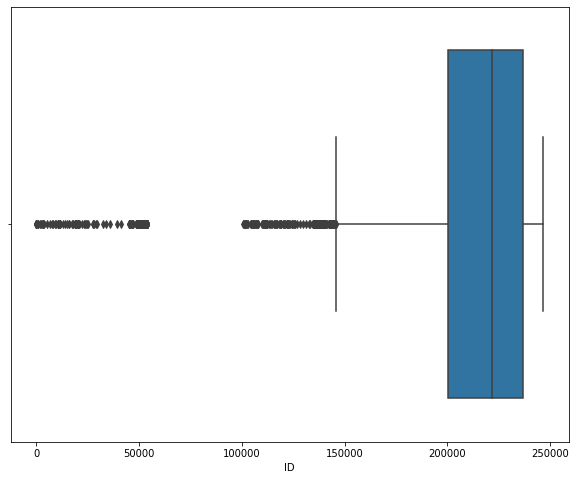

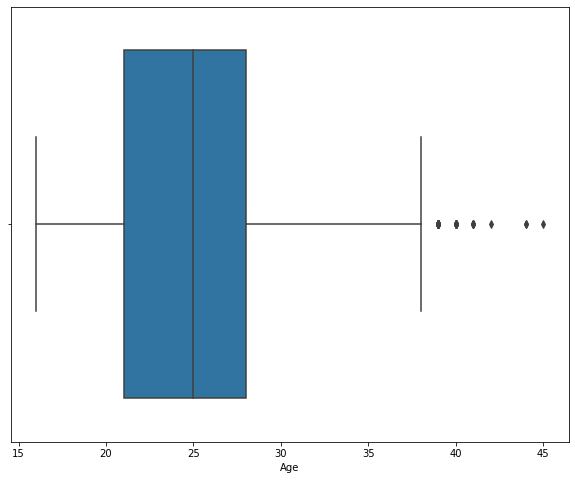

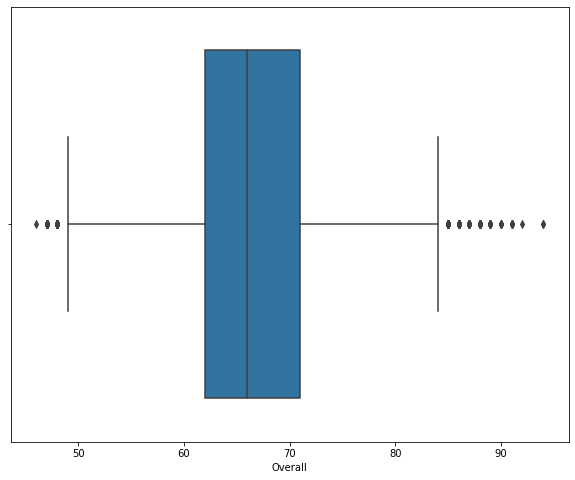

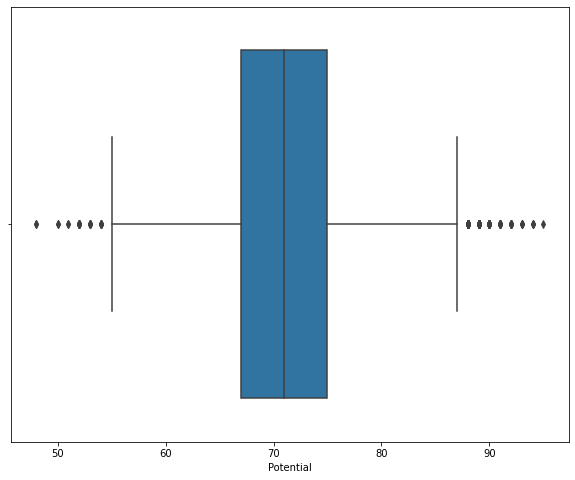

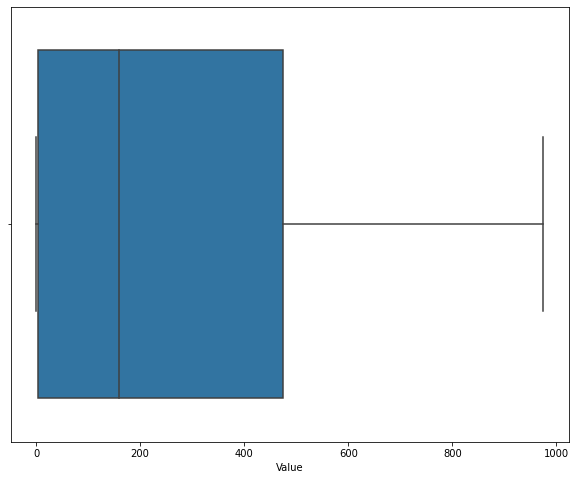

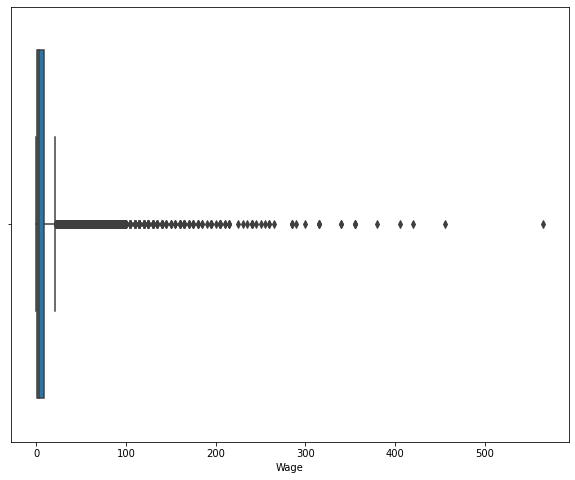

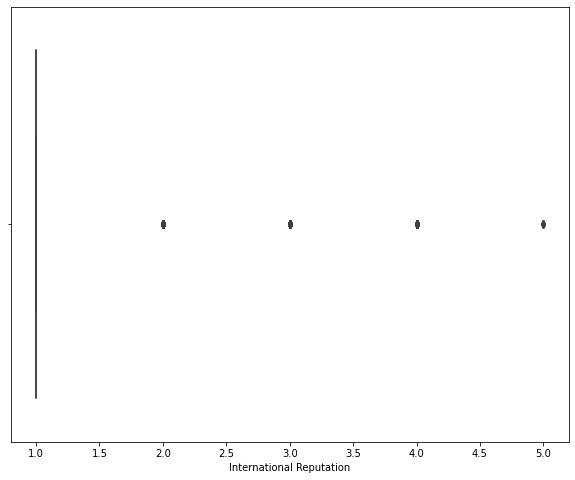

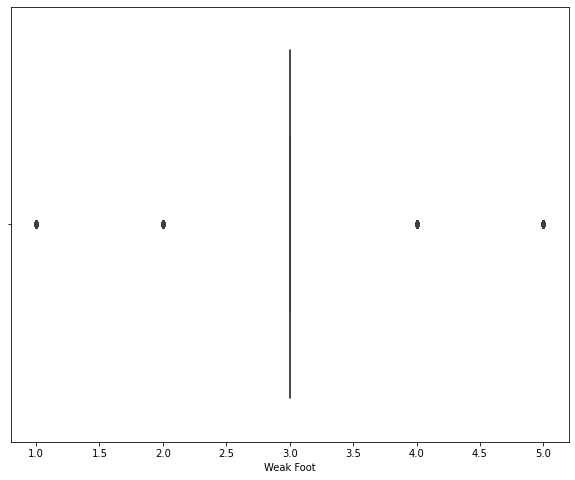

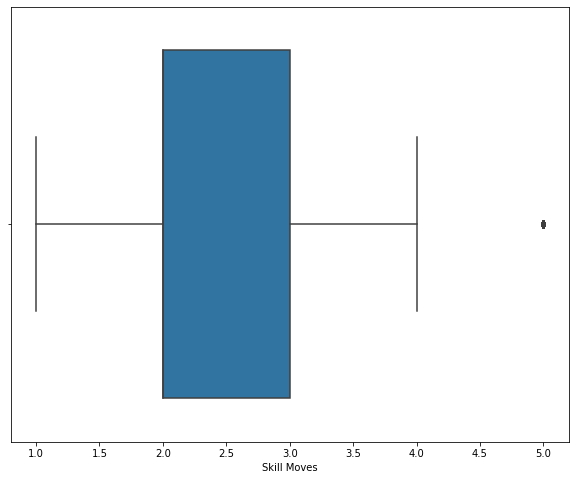

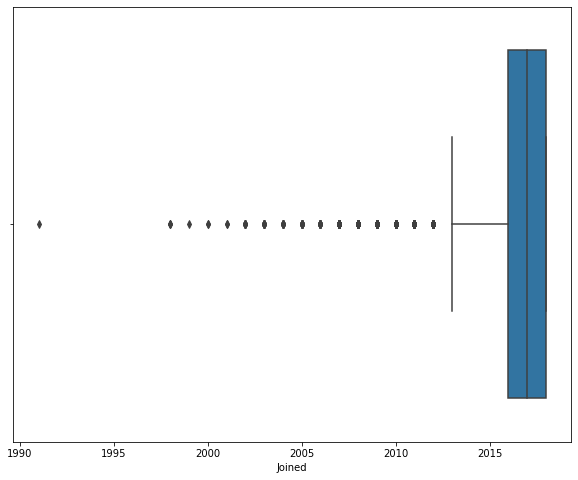

<Figure size 720x576 with 0 Axes>

In [36]:
func(df)

In [ ]:
df[["Height","Crossing","Finishing","Volleys","Curve","FKAccuracy","LongShots","Aggression","Interceptions","Positioning","Marking","StandingTackle","SlidingTackle","Release Clause"]]=df[["Height","Crossing","Finishing","Volleys","Curve","FKAccuracy","LongShots","Aggression","Interceptions","Positioning","Marking","StandingTackle","SlidingTackle","Release Clause"]].apply(lambda x:x.fillna(x.mean()))

### 1.	Plot the distribution of Overall rating for all players. 

In [ ]:
# df.groupby('Name')['Overall'].mean().plot(kind='hist')
sns.displot(df['Overall'])

### 2.	Generate pair plots for the following variables:
### Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [ ]:
sns.pairplot(df[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])

In [ ]:
df.Value

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [ ]:
df['years']=pd.DatetimeIndex(df['Contract Valid Until']).year

In [ ]:
top_20=df[df['years']==2020.0].sort_values(by='Overall',ascending=False).head(20)

In [ ]:
top_20

**a)	What would the average wage for this set of players be?**

In [ ]:
top_20['Wage'].mean()

**b)	What is the average age?**

In [ ]:
top_20['Age'].mean()

**c)	Is there a correlation between the Overall rating and Value for these players?**

In [ ]:
cmatrix=df[['Overall','Value']].corr()
cmatrix

Negative co-relation b/w Overall rating and Value of these players.

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [ ]:
df4=df.groupby('Position')['Overall'].unique().head()

In [ ]:
df4

In [ ]:
df5=df.sort_values(by='Overall',ascending=False).groupby('Position').head()
df5

**a)	Are there any players appearing in more than one Table. Please point out such players.**

In [ ]:
df['ID'].duplicated().value_counts()

**b)	What is the average wage one can expect to pay for the top 5 in every position?**

In [ ]:
df.groupby('Position')['Wage'].mean().head()